In [0]:
#for math operations
import numpy as np
#for plotting graph
from matplotlib import pyplot as plt
%matplotlib inline


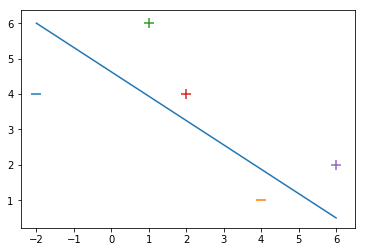

In [2]:
#define the toy data
#data = (xvalue, yvalue, bias)
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#labels of the above toy data
Y = np.array([-1,-1,1,1,1])

for d,sample in enumerate(X):
  #plot first 2 data points (negative case)
  if d < 2:
    plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths = 2)
  else:
    #plot last 3 data points(positive case)
    plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths = 2)
    
#plot a hyperplane using random guess of 2 points
plt.plot([-2,6],[6,0.5])    

In [0]:
#sgd (stochastic gradient descent) function to find the optimal hyperplane
def sgd_svm(X, Y):
  #initialize SVM's weight with zeros.
  w = np.zeros(len(X[0]))
  #learning rate
  lr = 1
  #no of epochs
  epochs = 10000
  #misclassified data
  errors = []
  
  #gradient descent
  for epoch in range(1, epochs):
    error = 0
    for i, x in enumerate(X):
      #misclassification case
      if(Y[i]*np.dot(X[i], w) < 1):
        w = w + lr * ((X[i] * Y[i]) - 2 * (1/epoch) * w)
        error = 1
      else:
        #correct classification
        w = w + lr * (- 2 * (1/epoch) * w)
    errors.append(error)
    
  #plot misclassification errors
  plt.plot(errors, '|')
  plt.ylim(0.5,1.5)
  plt.axes().set_yticklabels([])
  plt.xlabel('Epoch')
  plt.ylabel('Misclassified')
  plt.show()
    
  return w

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


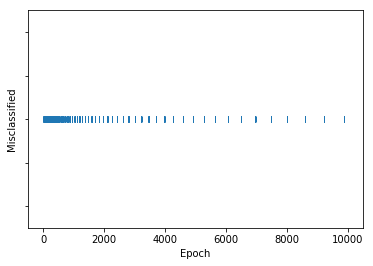

In [9]:
w = sgd_svm(X,Y)
#SVM is learning the optimal hyperplane

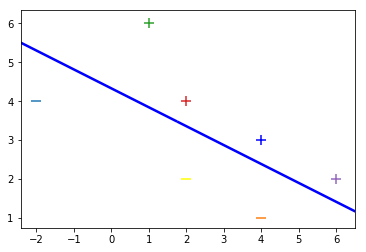

In [10]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

#print the hyperplane
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')